# Exploring preprocessing for CNN's: ZCA whitening
ZCA whitening is one algorithm for "normalizing" a dataset so that color variations between whole images are excluded from the data, and only the relative color differences of pixels within each image are perserved.
<br>
<br>
Normalization algorithms such as ZCA whitening are useful for preventing unwanted fitting to noise factors such as lighting. Ben Graham's winning Kaggle entry for diabetic retinopathy detection uses a similar method (subtracting each pixel's local average color, so that the local average of each image is mapped to 50% gray) to beneficial effect: https://kaggle2.blob.core.windows.net/forum-message-attachments/88655/2795/competitionreport.pdf. 
<br>
<br>
Intuituitively, normalization (and more specifically, ZCA whitening) can't be a good idea for all data types. For some classification tasks, color differences between images must be relevant. For example, if we wanted a classifier to distinguish between pictures of sand dunes and waves, normalizing the images to 50% gray would exclude useful information. As I understand it, this is not the case for fundus photos, where all the relevant information (the features of the eye) is contained in the relative differences among pixels of each image.
<br>
<br>
So what about cifar-10? Intuitively, relative color differences between images should be relevant to distinguishing between entities that display different color distributions (a car is more likely to be red than a horse), but in the data some of these difference must just be noise that isn't relevant to classification.  Which factor dominates? We will test a simple CNN on cifar-10 with and without ZCA whitening to find out.

references: https://machinelearningmastery.com/image-augmentation-deep-learning-keras/ <br>
https://kaggle2.blob.core.windows.net/forum-message-attachments/88655/2795/competitionreport.pdf. <br>
https://martin-thoma.com/zca-whitening/

These notes are incomplete. Right now they only show cifar-10 images with and without ZCA whitening applied.

In [1]:
from keras.datasets import cifar10

Using TensorFlow backend.


In [2]:
from matplotlib import pyplot

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)


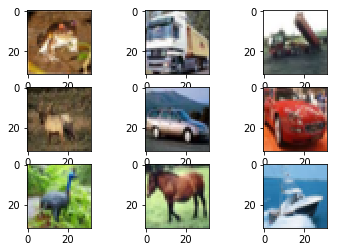

In [4]:
for i in range(0,9):
    pyplot.subplot(330+1+i)
    print(X_train[i].shape)
    pyplot.imshow(X_train[i], cmap=pyplot.get_cmap('gray'))
pyplot.show()

In [18]:
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
K.set_image_dim_ordering('tf')
X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
datagen = ImageDataGenerator(zca_whitening=True)

In [19]:
datagen.fit(X_train)

(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)


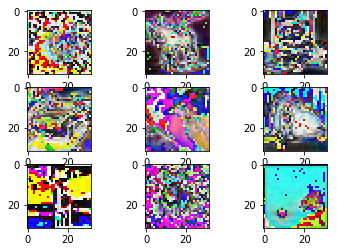

In [20]:
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
    for i in range(0,9):
        pyplot.subplot(330+1+i)
        pyplot.imshow(X_batch[i].reshape(32,32,3), cmap=pyplot.get_cmap('gray'))
        print(X_train[i].shape)
    pyplot.show()
    break